# Clustering

In [1]:
# Import the neccessary modules for data manipulation and visual representation

%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sb
from scipy import stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN # To instantiate and fit the model
from sklearn.metrics import pairwise_distances # For Model evaluation
from sklearn.neighbors import NearestNeighbors # For Hyperparameter Tuning

In [2]:
df = pd.read_csv('/Users/elisapashku/Desktop/Pisa/DMProject/df_final(1).csv')

In [3]:
# The dataset contains 27 columns and 1435 observations
df.shape

(1435, 27)

The data set contains 1435 records.  
The predictive attribute is the attrition. 

Since clustering is an ***unsupervised*** task we save the Attrition attribute in a variable and we remove it from the dataframe.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1435 entries, 0 to 1434
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                1435 non-null   int64  
 1   Age                       1435 non-null   float64
 2   Attrition                 1435 non-null   object 
 3   BusinessTravel            1435 non-null   object 
 4   Department                1435 non-null   object 
 5   DistanceFromHome          1435 non-null   int64  
 6   Education                 1435 non-null   int64  
 7   EducationField            1435 non-null   object 
 8   EnvironmentSatisfaction   1435 non-null   int64  
 9   Gender                    1435 non-null   object 
 10  JobInvolvement            1435 non-null   int64  
 11  JobLevel                  1435 non-null   int64  
 12  JobRole                   1435 non-null   object 
 13  JobSatisfaction           1435 non-null   int64  
 14  MaritalS

In [5]:
attrition_col = df['Attrition']
df= df.drop(['Unnamed: 0', 'Attrition', 'Education','EnvironmentSatisfaction','JobInvolvement', 
                      'JobSatisfaction','RelationshipSatisfaction', 'Department', 'EducationField', 'Gender', 'JobRole',
                      'MaritalStatus', 'NumCompaniesWorked','TrainingTimesLastYear','StockOptionLevel','WorkLifeBalance', 
                      'JobLevel','PerformanceRating', 'Attrition_numerical', 'OverTime', 'BusinessTravel'], axis= 1)
df.head()

,Age,DistanceFromHome,MonthlyIncome,PercentSalaryHike,YearsAtCompany,YearsInCurrentRole
0,52.0,9,8446.0,17,8.0,7
1,36.0,1,4834.0,14,1.0,8
2,60.0,16,4768.0,25,1.0,5
3,33.0,5,2799.0,14,3.0,7
4,31.0,9,7978.0,12,10.0,2


In [6]:
df.columns

Index(['Age', 'DistanceFromHome', 'MonthlyIncome', 'PercentSalaryHike',
       'YearsAtCompany', 'YearsInCurrentRole'],
      dtype='object')

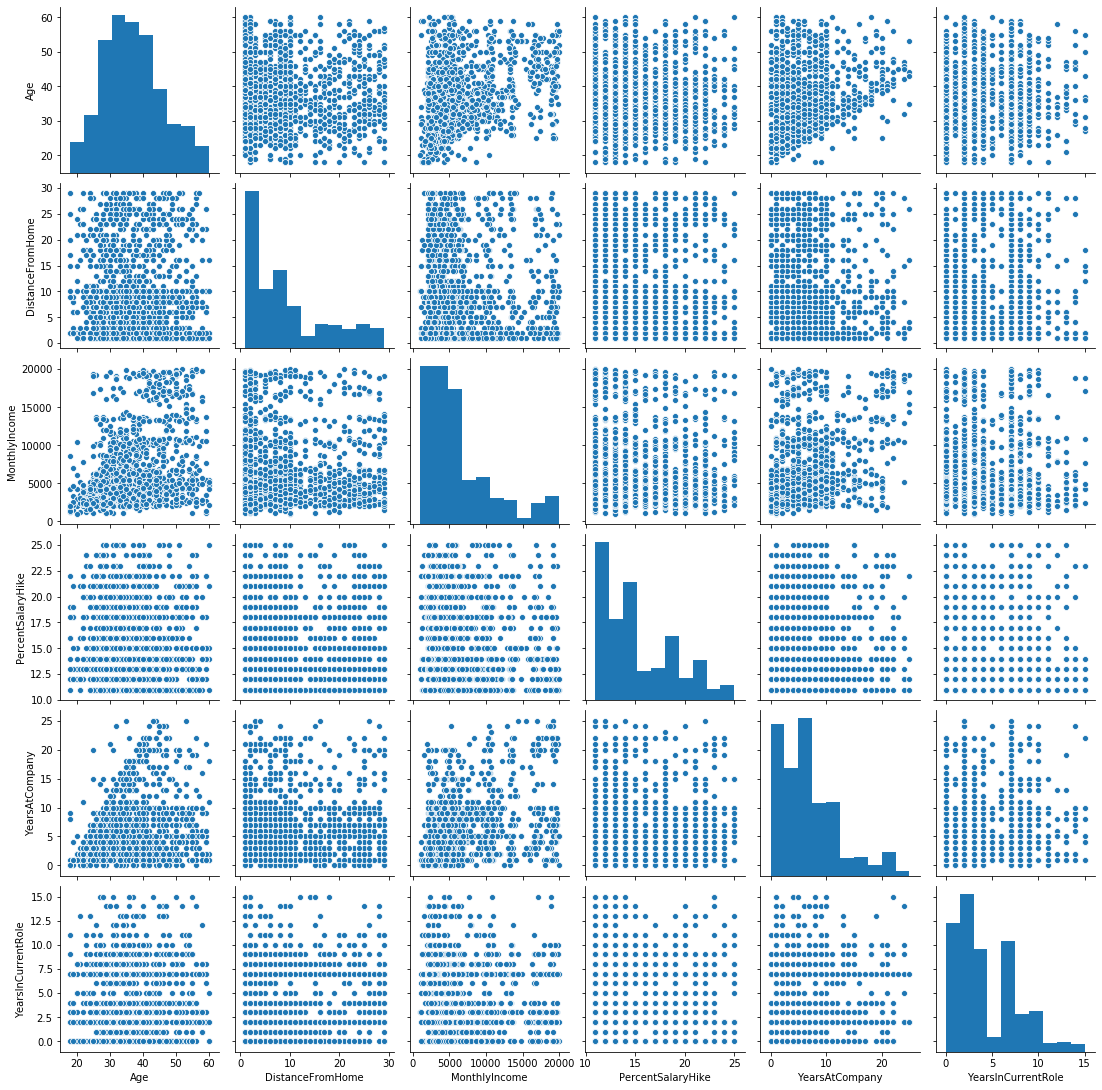

In [7]:
sb.pairplot(data= df, kind='scatter')

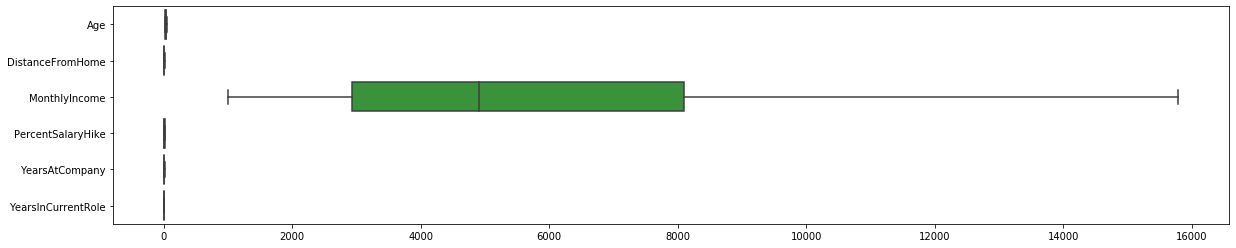

In [8]:
plt.figure(figsize = (20,4))
sb.boxplot(data = df, orient = "h",  showfliers = False)
plt.show()

# Clustering Preprocessing 

A good practice in clustering to avoid the bias given by the range of the different attribute is normalization.  
The most common adopted normalizations are: ***Z-Score*** (mean 0, standard deviation 1) and ***Min-Max*** (scales data from 0 to 1)

In [9]:
scaler = StandardScaler()
scaled_array = scaler.fit_transform(df.values)

In [10]:
#The scaled array is put in a dataframe
scaled_df = pd.DataFrame( scaled_array, columns = df.columns )
scaled_df.head()

,Age,DistanceFromHome,MonthlyIncome,PercentSalaryHike,YearsAtCompany,YearsInCurrentRole
0,1.658983,-0.022011,0.440188,0.489664,0.278497,0.839857
1,-0.115711,-1.009057,-0.345936,-0.331210,-1.061945,1.130756
2,2.546330,0.841655,-0.360301,2.678661,-1.061945,0.258059
3,-0.448466,-0.515534,-0.788838,-0.331210,-0.678962,0.839857
4,-0.670302,-0.022011,0.338331,-0.878459,0.661481,-0.614638


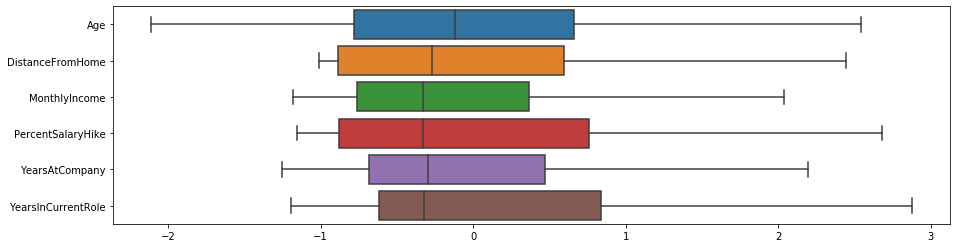

In [11]:
plt.figure(figsize = (15,4))
sb.boxplot(data = scaled_df, orient = "h",  showfliers = False)
plt.show()

# K-Means Problem

Objective: Clusters the data into k groups
- **Init step**: Select k points at random as cluster centers.
- **Assignment step**: Assign each instance to the cluster with the closest mean according to the distance function.
- **Update step**: Calculate the new means to be the centroids of the instances in the new clusters.
- **Repeat steps 2 and 3** until the assignment no longer changes.  (Iterative function)



!!!The real task is in the interpretation of the results.

Parameters:
* **n_clusters** : The number of clusters
* **n_init** (default 10): Number of time k-means will be run with different initial centroids. The final results will be the best output in terms of inertia.
* **max_iter** (default 300): Maximum number of iterations of the k-means algorithm for a single run. (if the convergence isnot reached, stop and provide the results)

In [12]:
sse_list = list()
max_k = 50
for k in range(2, max_k + 1):
    kmeans = KMeans(n_clusters=k, n_init=20, max_iter=300)
    kmeans.fit(scaled_df)
    
    sse = kmeans.inertia_
    sse_list.append(sse)

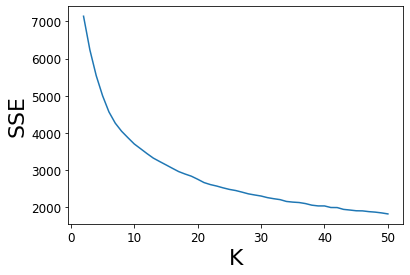

In [13]:
plt.plot(range(2, len(sse_list) + 2), sse_list)
plt.ylabel('SSE', fontsize=22)
plt.xlabel('K', fontsize=22)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.show()

In [14]:
sse_list

[7136.269798232309,
 6231.3455998195295,
 5540.392700225879,
 5002.803670548705,
 4568.830492547054,
 4265.480137998016,
 4047.91400244497,
 3873.9901497427554,
 3705.988983721278,
 3578.0165171123876,
 3448.617380527894,
 3326.9367904109017,
 3234.507136165007,
 3144.837980682392,
 3053.6105741064007,
 2964.5284827810397,
 2899.094671447251,
 2840.707506289527,
 2758.4034879927012,
 2669.382262244752,
 2615.1871037185983,
 2575.6617000147244,
 2527.86661675275,
 2485.7229384360853,
 2455.2032842921094,
 2412.1251076503236,
 2366.3129495211665,
 2335.8303499126564,
 2307.694923863881,
 2264.8527012103673,
 2235.729978468466,
 2210.8866262586484,
 2162.087091652682,
 2144.344805898961,
 2133.265055043933,
 2104.9573150275446,
 2062.342794347972,
 2042.1930953280835,
 2041.6799776627506,
 1999.5582998987097,
 1997.817996078353,
 1949.2220421502498,
 1931.704793864173,
 1912.0044811546463,
 1908.865105744232,
 1888.5361551475721,
 1875.417096558352,
 1854.645916309343,
 1827.3564976416133

In [15]:
k_to_test = range(2,25,1) # [2,3,4, ..., 24]
silhouette_scores = {}

for k in k_to_test:
    model_kmeans_k = KMeans( n_clusters = k )
    model_kmeans_k.fit(scaled_df)
    labels_k = model_kmeans_k.labels_
    score_k = metrics.silhouette_score(scaled_df, labels_k)
    silhouette_scores[k] = score_k
    print("Tested kMeans with k = %d\tSS: %5.4f" % (k, score_k))
    

print("Done!")

Tested kMeans with k = 2	SS: 0.2201
Tested kMeans with k = 3	SS: 0.1743
Tested kMeans with k = 4	SS: 0.1769
Tested kMeans with k = 5	SS: 0.1719
Tested kMeans with k = 6	SS: 0.1853
Tested kMeans with k = 7	SS: 0.1791
Tested kMeans with k = 8	SS: 0.1770
Tested kMeans with k = 9	SS: 0.1818
Tested kMeans with k = 10	SS: 0.1741
Tested kMeans with k = 11	SS: 0.1821
Tested kMeans with k = 12	SS: 0.1677
Tested kMeans with k = 13	SS: 0.1712
Tested kMeans with k = 14	SS: 0.1728
Tested kMeans with k = 15	SS: 0.1661
Tested kMeans with k = 16	SS: 0.1655
Tested kMeans with k = 17	SS: 0.1688
Tested kMeans with k = 18	SS: 0.1650
Tested kMeans with k = 19	SS: 0.1743
Tested kMeans with k = 20	SS: 0.1665
Tested kMeans with k = 21	SS: 0.1649
Tested kMeans with k = 22	SS: 0.1728
Tested kMeans with k = 23	SS: 0.1686
Tested kMeans with k = 24	SS: 0.1715
Done!


In [16]:
silhouette_scores.values()

dict_values([0.22009807226610795, 0.17434560827807216, 0.17692865813341355, 0.17192626763651295, 0.18527184975433006, 0.17908845797959133, 0.17701574053703142, 0.18180760982885866, 0.17408369668091145, 0.18209867378564176, 0.16766202194630056, 0.1712410246255986, 0.17283153233535012, 0.16609466430290193, 0.16554218114671487, 0.16878413723169136, 0.16504315198243177, 0.17431746917333513, 0.16649142314845547, 0.1649103710278286, 0.17276539926194182, 0.1685978796415995, 0.1715278268056294])

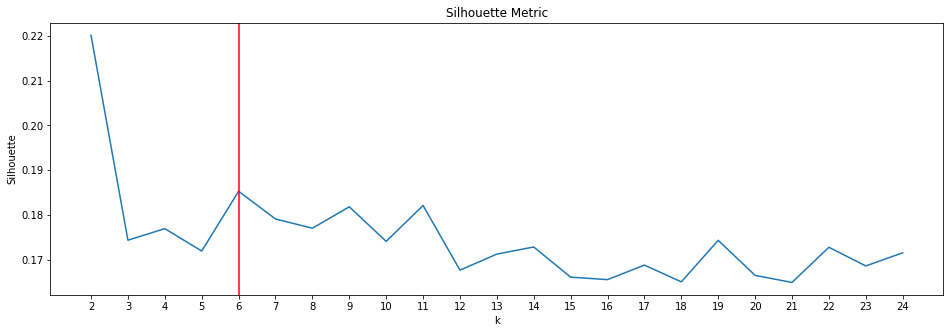

In [17]:
plt.figure(figsize = (16,5))
plt.plot(np.array(list(silhouette_scores.values())).astype(float))
plt.xticks(range(0,23,1), silhouette_scores.keys())
plt.title("Silhouette Metric")
plt.xlabel("k")
plt.ylabel("Silhouette")
plt.axvline(4, color = "r")
plt.show()

In [18]:
kmeans_model = KMeans(n_clusters = 6, max_iter = 500, n_init=20)

In [19]:
kmeans_model.fit(scaled_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=500,
       n_clusters=6, n_init=20, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

### Centers

In [20]:
centroids = kmeans_model.cluster_centers_
centroids

array([[-0.13089865,  1.66846002, -0.2913441 ,  0.05708745, -0.27293567,
        -0.00628507],
       [ 1.03517163, -0.14910231,  1.9694248 , -0.13164892, -0.22686843,
        -0.03502738],
       [-0.01938681, -0.3717444 , -0.40089089, -0.47522271, -0.27150186,
         1.26308236],
       [-0.26280384, -0.46641845, -0.35137935, -0.58186828, -0.21102386,
        -0.69416467],
       [-0.25660696, -0.42168843, -0.32500472,  1.38977297, -0.12962438,
        -0.18895975],
       [ 0.63089111,  0.17083654,  1.22368753,  0.10796928,  2.43479123,
         0.07227462]])

In [21]:
kmeans_model.cluster_centers_.shape

(6, 6)

In [22]:
kmeans_model.labels_

array([1, 2, 4, ..., 0, 0, 0], dtype=int32)

In [23]:
scaled_df["cluster"] = kmeans_model.labels_

In [24]:
scaled_df.head()

,Age,DistanceFromHome,MonthlyIncome,PercentSalaryHike,YearsAtCompany,YearsInCurrentRole,cluster
0,1.658983,-0.022011,0.440188,0.489664,0.278497,0.839857,1
1,-0.115711,-1.009057,-0.345936,-0.331210,-1.061945,1.130756,2
2,2.546330,0.841655,-0.360301,2.678661,-1.061945,0.258059,4
3,-0.448466,-0.515534,-0.788838,-0.331210,-0.678962,0.839857,2
4,-0.670302,-0.022011,0.338331,-0.878459,0.661481,-0.614638,3


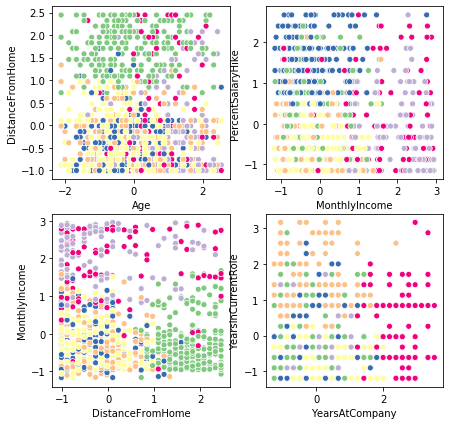

In [25]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize = (7,7))

sb.scatterplot(x = "Age", y = "DistanceFromHome", data = scaled_df, hue = "cluster", palette = "Accent", ax = ax1, legend=False)
sb.scatterplot(x = "MonthlyIncome", y = "PercentSalaryHike", data = scaled_df, hue = "cluster", palette = "Accent",ax = ax2, legend=False)
sb.scatterplot(x = "DistanceFromHome", y = "MonthlyIncome", data = scaled_df, hue = "cluster", palette = "Accent", ax = ax3, legend=False)
sb.scatterplot(x = "YearsAtCompany", y = "YearsInCurrentRole", data = scaled_df, hue = "cluster", palette = "Accent",ax = ax4, legend=False)

plt.show()

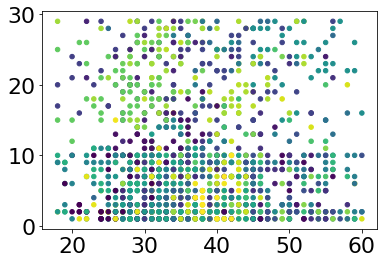

In [26]:
# Colors are with respect to clustering labels not class labels.
plt.scatter(df['Age'], df['DistanceFromHome'], 
            c=kmeans.labels_, s=20)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.show()

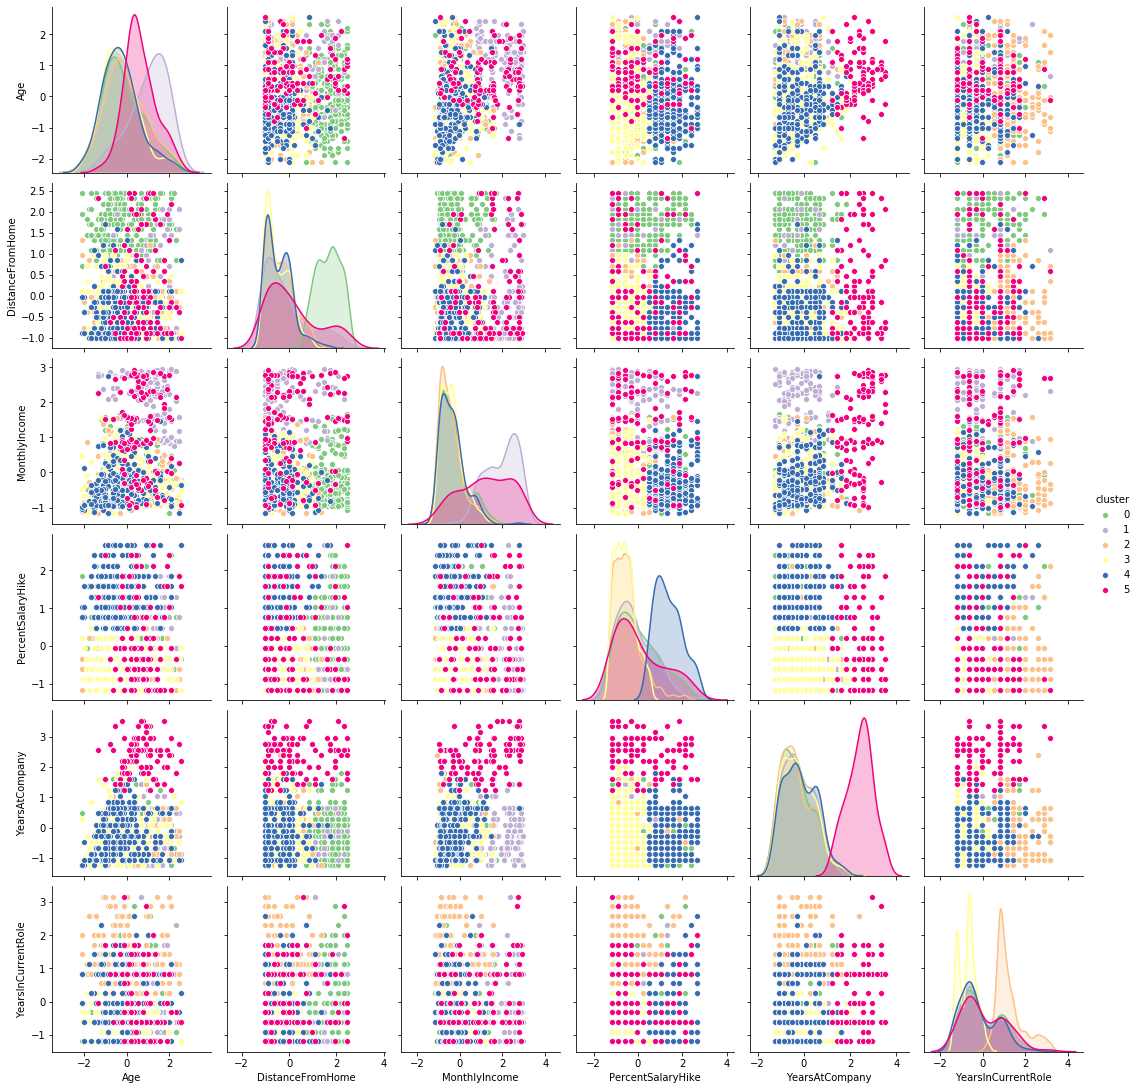

In [27]:
sb.pairplot(data= scaled_df, hue ="cluster", palette = "Accent")
plt.show()

Visualization of clusters centers by means of parallel coordinates

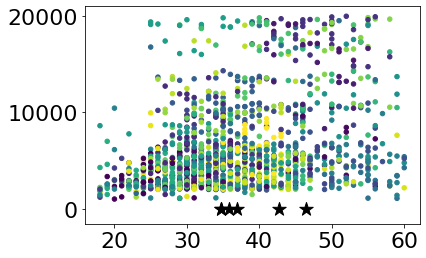

In [28]:
# List of attributes and the centroids
centers = scaler.inverse_transform(kmeans_model.cluster_centers_)

plt.scatter(df['Age'], df['MonthlyIncome'], c=kmeans.labels_, 
            s=20)
plt.scatter(centers[:, 0], centers[:, 3], s=200, marker='*', c='k')
plt.tick_params(axis='both', which='major', labelsize=22)
plt.show()

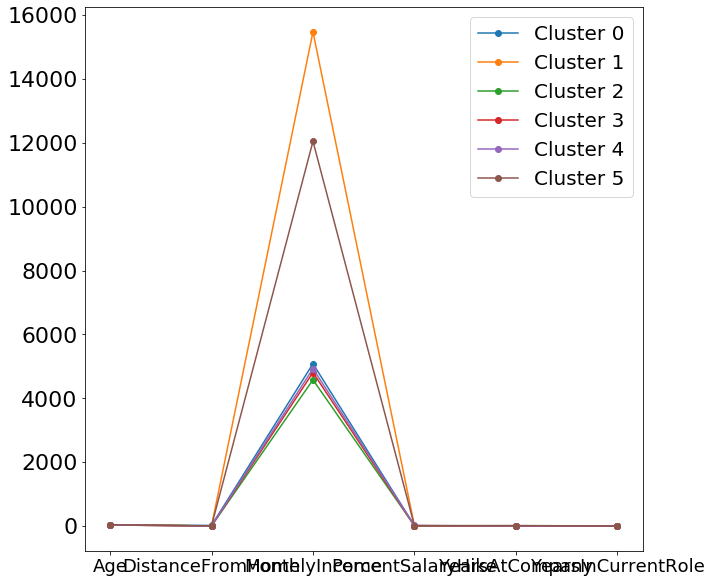

In [29]:
plt.figure(figsize=(10, 10))
for i in range(0, len(centers)):
    plt.plot(centers[i], marker='o', label='Cluster %s' % i)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.xticks(range(0, len(df.columns)), df.columns, fontsize=18)
plt.legend(fontsize=20)
plt.show()

Visualize centroids by radar chart


/Users/elisapashku/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  del sys.path[0]
/Users/elisapashku/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  del sys.path[0]
/Users/elisapashku/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Adding an axes using the same

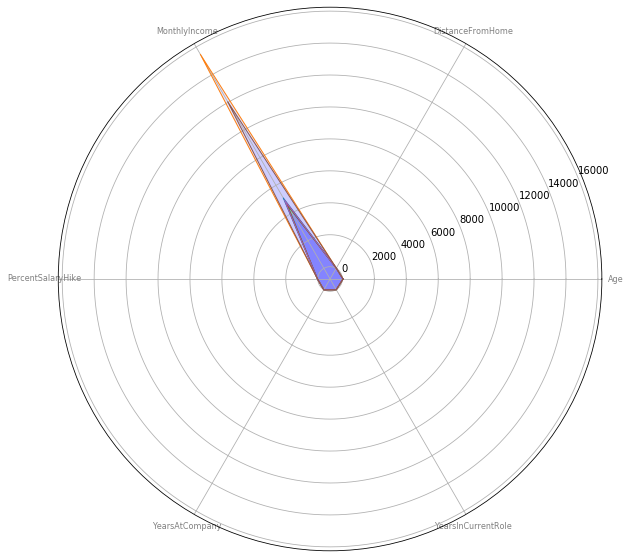

In [30]:
# Provides the relationship between different features 
from math import pi
plt.figure(figsize=(10, 10))
# number of variable
N = len(df.columns)
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
for i in range(0, len(centers)):
    angles = [n / float(N) * 2 * pi for n in range(N)]
    values = centers[i].tolist()
    values += values[:1]
    angles += angles[:1]
    # Initialise the spider plot
    ax = plt.subplot(polar=True)
# Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], df.columns, color='grey', size=8) 
# Plot data
    ax.plot(angles, values, linewidth=1, linestyle='solid')
 # Fill area
    ax.fill(angles, values, 'b', alpha=0.1)

In [31]:
#Similarity between assignments
metrics.adjusted_rand_score(attrition_col, kmeans.labels_)

0.0006934645098266042

SSE and Clustering Validation

In [32]:
from sklearn import metrics
print('SSE %s' % kmeans.inertia_)
print('Silhouette %s' % silhouette_score(scaled_array, kmeans.labels_))
print('Separation %s' % metrics.davies_bouldin_score(scaled_array, kmeans.labels_))


SSE 1827.3564976416133
Silhouette 0.1632597619963464
Separation 1.3794707197446905


## Elbow Method

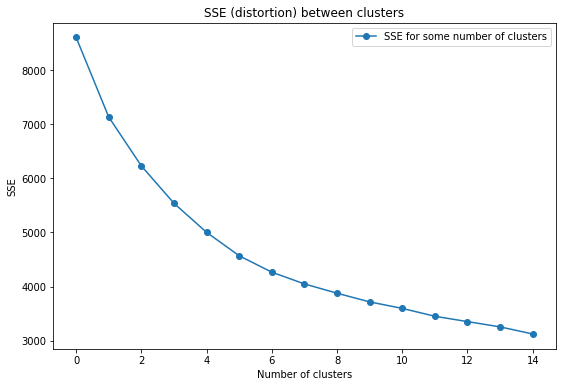

In [33]:
cluster_distorsion = []
for i in range(1, 16):
    test_sklearn = KMeans(n_clusters=i)
    test_sklearn.fit(scaled_array)
    cluster_distorsion.append(test_sklearn.inertia_)
plt.figure(figsize=(9, 6))
plt.plot(cluster_distorsion, marker='o', label='SSE for some number of clusters')
plt.title("SSE (distortion) between clusters")
plt.xlabel('Number of clusters')
plt.ylabel("SSE")
plt.legend()
plt.show()

Parameters:
* **eps**: The maximum distance between two samples for them to be considered as in the same neighborhood.
* **min_samples**: The number of samples in a neighborhood for a point to be considered as a core point. This includes the point itself.

# DBSCAN

In [34]:
del scaled_df['cluster']

In [35]:
dbscan_model = DBSCAN( eps = 0.8, min_samples =10, metric='euclidean')

In [36]:
dbscan_model.fit(scaled_df)

DBSCAN(algorithm='auto', eps=0.8, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=10, n_jobs=None, p=None)

Output:
* **labels_**: Cluster labels for each point in the dataset. Noisy samples are given the label -1.

Labels

In [37]:
labels = dbscan_model.labels_
labels

array([-1,  0, -1, ..., -1, -1, -1])

In [38]:
scaled_df["LABEL"] = labels
scaled_df.head(15)

,Age,DistanceFromHome,MonthlyIncome,PercentSalaryHike,YearsAtCompany,YearsInCurrentRole,LABEL
0,1.658983,-0.022011,0.440188,0.489664,0.278497,0.839857,-1
1,-0.115711,-1.009057,-0.345936,-0.331210,-1.061945,1.130756,0
2,2.546330,0.841655,-0.360301,2.678661,-1.061945,0.258059,-1
3,-0.448466,-0.515534,-0.788838,-0.331210,-0.678962,0.839857,0
4,-0.670302,-0.022011,0.338331,-0.878459,0.661481,-0.614638,-1
5,-0.226629,-0.268772,-0.904189,-1.152084,-1.061945,-0.614638,0
6,-1.113976,-0.638915,0.501128,-1.152084,0.469989,-0.323739,0
7,-0.004792,-0.145392,-0.150711,0.763289,-0.104486,0.839857,-1
8,0.549800,-1.009057,-0.220574,-0.878459,-0.487470,0.839857,0
9,-1.557649,-0.762296,-1.008439,1.310538,-1.061945,0.258059,-1


Observing the size of each cluster

In [39]:
np.unique(dbscan.labels_, return_counts=True)

NameError: name 'dbscan' is not defined

In [ ]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize = (13,8))

sb.scatterplot(x = "Age", y = "DistanceFromHome", data = scaled_df, hue = "LABEL", palette = "Accent", ax = ax1)
sb.scatterplot(x = "MonthlyIncome", y = "PercentSalaryHike", data = scaled_df, hue = "LABEL", palette = "Accent", ax = ax2)
sb.scatterplot(x = 'YearsAtCompany', y = "MonthlyIncome", data =scaled_df, hue = "LABEL", palette = "Accent", ax = ax3)
sb.scatterplot(x = "DistanceFromHome", y = "YearsInCurrentRole", data = scaled_df, hue = "LABEL", palette = "Accent", ax = ax4)

plt.tight_layout()
plt.show()

In [ ]:
sb.pairplot(data = scaled_df, hue = "LABEL", palette = "Accent_r")
plt.show()

In [ ]:
eps_to_test = [round(eps,1) for eps in np.arange(0.1, 2, 0.1)]
min_samples_to_test = range(5, 50, 5)

print("EPS:", eps_to_test)
print("MIN_SAMPLES:", list(min_samples_to_test))

In [ ]:
def get_metrics(eps, min_samples, dataset, iter_):
    
    # Fitting ======================================================================
    
    dbscan_model_ = DBSCAN( eps = eps, min_samples = min_samples)
    dbscan_model_.fit(dataset)
    
    # Mean Noise Point Distance metric =============================================
    noise_indices = dbscan_model_.labels_ == -1
    
    if True in noise_indices:
        neighboors = NearestNeighbors(n_neighbors = 6).fit(dataset)
        distances, indices = neighboors.kneighbors(dataset)
        noise_distances = distances[noise_indices, 1:]
        noise_mean_distance = round(noise_distances.mean(), 3)
    else:
        noise_mean_distance = None
        
    # Number of found Clusters metric ==============================================
    
    number_of_clusters = len(set(dbscan_model_.labels_[dbscan_model_.labels_ >= 0]))
    
    # Log ==========================================================================
    
    print("%3d | Tested with eps = %3s and min_samples = %3s | %5s %4s" % (iter_, eps, min_samples, str(noise_mean_distance), number_of_clusters))
        
    return(noise_mean_distance, number_of_clusters)

In [ ]:
# Dataframe per la metrica sulla distanza media dei noise points dai K punti più vicini
results_noise = pd.DataFrame( 
    data = np.zeros((len(eps_to_test),len(min_samples_to_test))), # Empty dataframe
    columns = min_samples_to_test, 
    index = eps_to_test
)

# Dataframe per la metrica sul numero di cluster
results_clusters = pd.DataFrame( 
    data = np.zeros((len(eps_to_test),len(min_samples_to_test))), # Empty dataframe
    columns = min_samples_to_test, 
    index = eps_to_test
)

In [ ]:
iter_ = 0

print("ITER| INFO%s |  DIST    CLUS" % (" "*39))
print("-"*65)

for eps in eps_to_test:
    for min_samples in min_samples_to_test:
        
        iter_ += 1
        
        # Calcolo le metriche
        noise_metric, cluster_metric = get_metrics(eps, min_samples, scaled_df, iter_)
        
        # Inserisco i risultati nei relativi dataframe
        results_noise.loc[eps, min_samples] = noise_metric
        results_clusters.loc[eps, min_samples] = cluster_metric

In [ ]:
# We will take eps= 0.7 and N=5
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,8) )

sb.heatmap(results_noise, annot = True, ax = ax1, cbar = False).set_title("METRIC: Mean Noise Points Distance")
sb.heatmap(results_clusters, annot = True, ax = ax2, cbar = False).set_title("METRIC: Number of clusters")

ax1.set_xlabel("N"); ax2.set_xlabel("N")
ax1.set_ylabel("EPSILON"); ax2.set_ylabel("EPSILON")

plt.tight_layout(); plt.show()

In [ ]:
# Istantiating with eps = 0.7 and min_samples = 5 (best model)
best_dbscan_model = DBSCAN( eps = 1.2, min_samples = 10)

# Fitting
best_dbscan_model.fit(scaled_df)

# Extracting labels
scaled_df["LABEL"] = best_dbscan_model.labels_

# Pairplot
sb.pairplot( scaled_df, hue = "LABEL" ); plt.show()

# Hierarchical Clustering

In contrast to partioning methods, where the number of clusters (k) needs to be specified a priori, **hierarchical clustering methods** build up the clusters step by step. The size of the cluster is determined from the results at each step that are visually represented in a tree structure **(dendrogram)**.
- **Agglomerative hierarchical clustering** - bottom-up approach - each observation being assigned to its own cluster (i.e., n clusters of one observation each)
- **Divisive clustering** - top-down approach

In [ ]:
from scipy.stats import mode
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram

**Complete linkage** is the opposite of *single linkage* in that the dissimilarity between two clusters is defined as the furthest neighbors, i.e., the pair of points, one from each cluster, that are separated by the greatest dissimilarity.
In contrast to single linkage, complete linkage tends to result in a large number of well-balanced compact clusters.

In [ ]:
data_dist = pdist(scaled_df, metric='euclidean')
data_link = linkage(data_dist, method='complete', metric='euclidean')
res = dendrogram(data_link, color_threshold=1.0, truncate_mode='lastp')

The vertical line represents **a cut line**. It corresponds with a particular value of k for which the make up of the clusters and their characteristics can be further investigated

In [ ]:
Y = linkage(data_dist, method='complete')
fig = plt.figure(figsize=(10, 5))
dn = dendrogram(Y, truncate_mode='lastp')
plt.axhline(linestyle='-', y=6.7, color='r')
plt.show()

In average linkage, the dissimilarity between two clusters is the average of all pairwise dissimilarities between observations *i* in cluster **A** and *j* in cluster **B**.

In [ ]:
data_link1 = linkage(data_dist, method='average', metric='euclidean')
res = dendrogram(data_link1, color_threshold=4, truncate_mode='lastp')
plt.axhline(linestyle='-', y=4, color='r')

In [ ]:
R = linkage(data_dist, method='average')
fig = plt.figure(figsize=(10, 5))
dn = dendrogram(R, truncate_mode='lastp')
plt.axhline(linestyle='-', y=4.3, color='r')
plt.show()

The method developed by Ward (1963) is based on *a sum of squared errors rationale* that only works for Euclidean distance between observations. The sum of squared errors requires the consideration of the so-called **centroid** of each cluster, i.e., the mean vector of the observations belonging to the cluster. Therefore, the input into Ward’s method is a n×p matrix X of actual observations on p variables (as before, this is typically standardized in some fashion).

In [ ]:
Z = linkage(data_dist, method= 'ward')
fig = plt.figure(figsize=(10, 5))
dn = dendrogram(Z, truncate_mode='lastp')
plt.axhline(linestyle='-', y=30, color='r')